In [15]:
import pydicom
import os


def get_dicom_image_shape(dicom_folder):
    dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(
        dicom_folder) if f.endswith('.dcm')]

    if dicom_files:
        ref_dicom = pydicom.read_file(dicom_files[0])
        image_shape = (ref_dicom.Rows, ref_dicom.Columns)
        print(f"DICOM Image Shape: {image_shape}")
    else:
        print("No DICOM files found in the specified folder.")

get_dicom_image_shape(
    'dcmFile')

DICOM Image Shape: (256, 256)


In [16]:
import nibabel as nib
import numpy as np


def convert_dicom_to_nifti(dicom_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(
        dicom_folder) if f.endswith('.dcm')]

    ref_dicom = pydicom.read_file(dicom_files[0])
    image_shape = (ref_dicom.Rows, ref_dicom.Columns, len(dicom_files))
    image_dtype = ref_dicom.pixel_array.dtype

    data_array = np.zeros(image_shape, dtype=image_dtype)

    for index, dicom_file in enumerate(dicom_files):
        dicom_data = pydicom.read_file(dicom_file)
        data_array[:, :, index] = dicom_data.pixel_array

    nifti_image = nib.Nifti1Image(data_array, affine=np.eye(4))

    original_name = os.path.splitext(os.path.basename(dicom_files[0]))[0]
    nifti_filename = original_name + ".nii"

    nifti_file_path = os.path.join(output_folder, nifti_filename)

    nib.save(nifti_image, nifti_file_path)


# 示例用法
convert_dicom_to_nifti('dcmFile', 'niiFile')

In [20]:
import nibabel as nib

nii_file_path = 'path_to_your_nii_file.nii'
nii_image = nib.load(
    'niiFile/ADNI_009_S_4359_MR_Axial_T2-FLAIR_br_raw_20111209075722350_23_S132245_I270647.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (256, 256, 35)


c:\Users\MR600\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



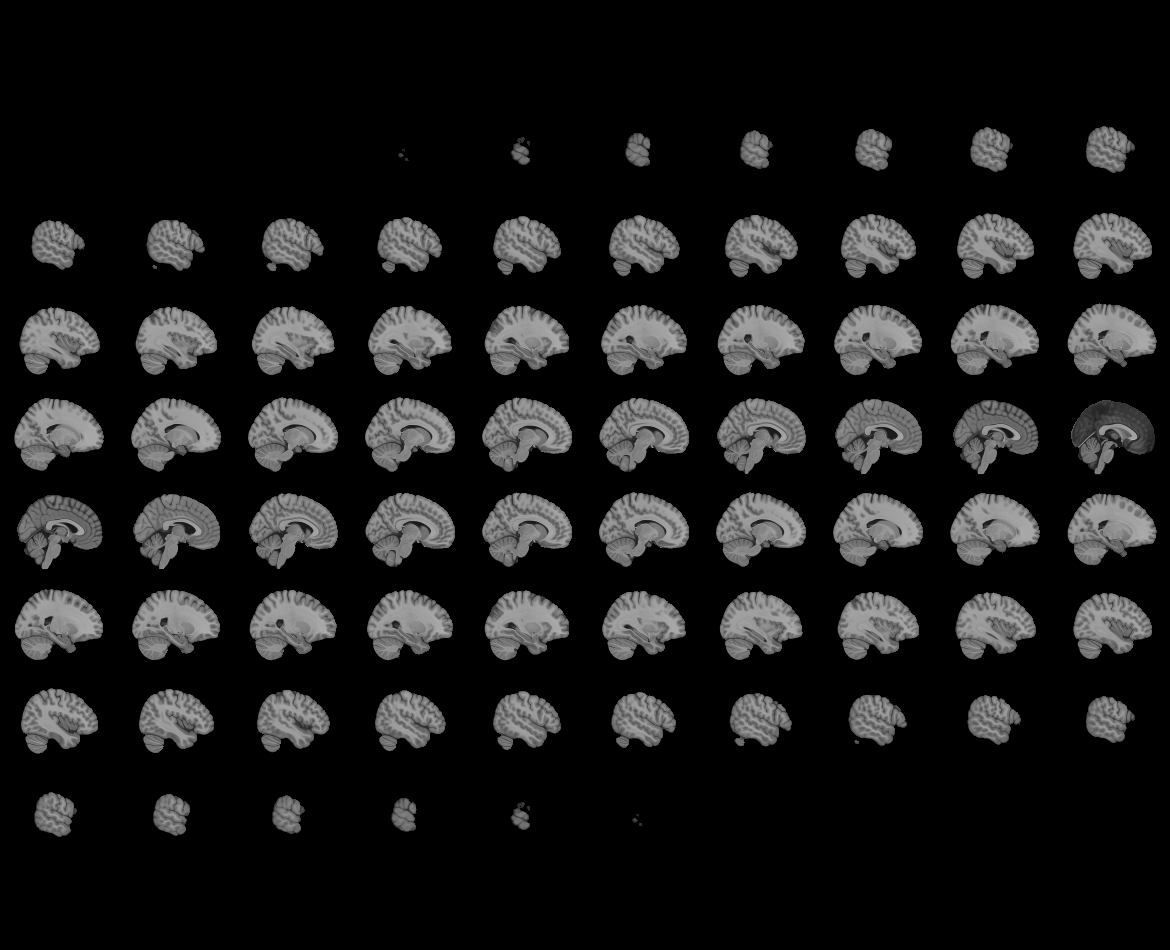
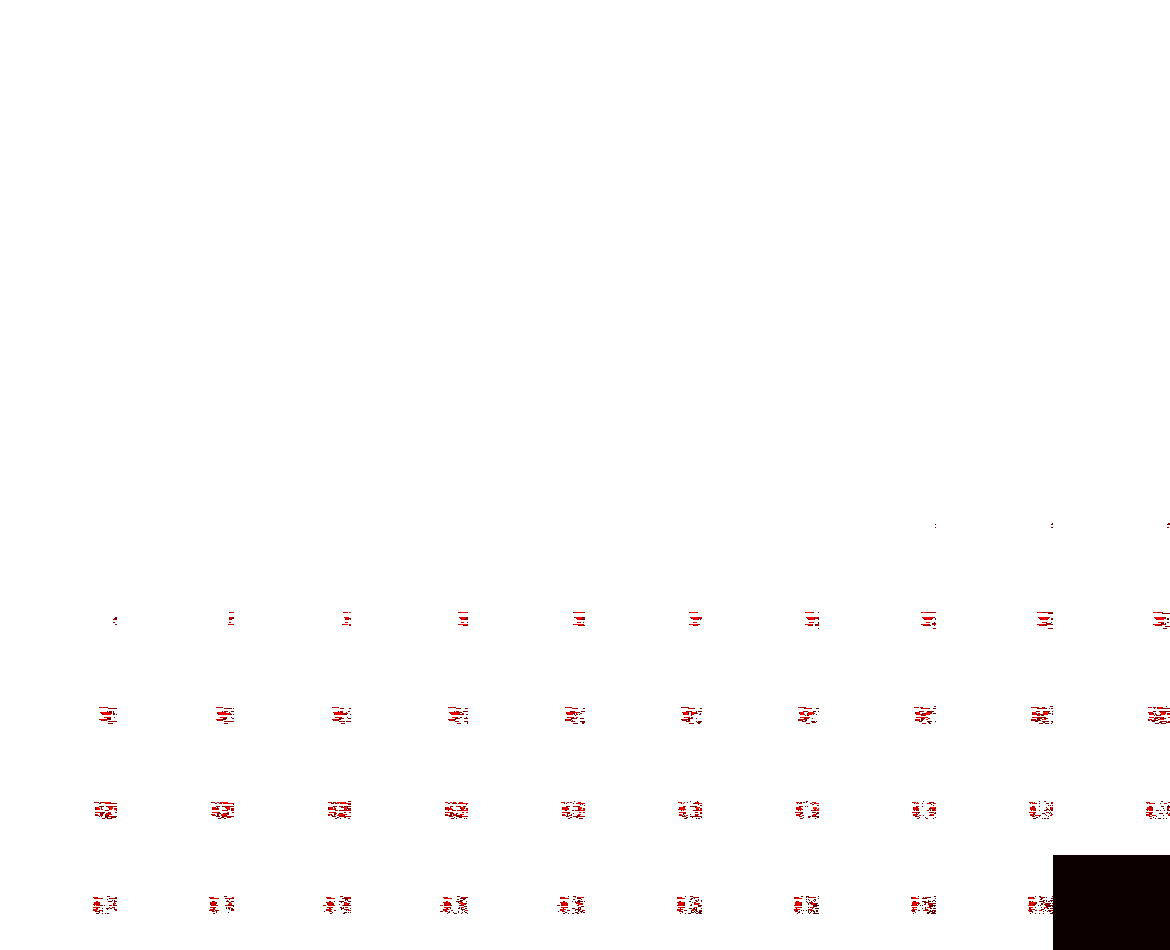

In [23]:
from nilearn import plotting

nifti_file = 'niiFile/ADNI_009_S_4359_MR_Axial_T2-FLAIR_br_raw_20111209075722350_23_S132245_I270647.nii'

view = plotting.view_img(nifti_file, threshold='auto')
view

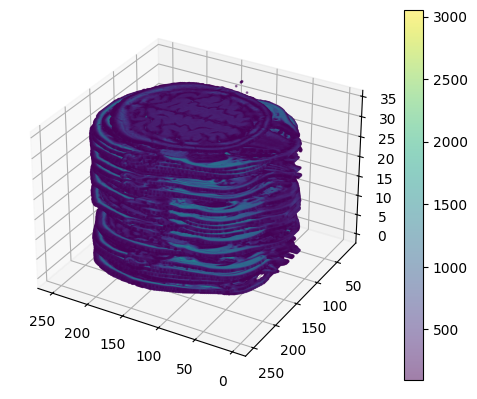

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
import numpy as np

nifti_file = 'niiFile/ADNI_009_S_4359_MR_Axial_T2-FLAIR_br_raw_20111209075722350_23_S132245_I270647.nii'
#nifti_file = 'ADNI_RESIZED/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 100  
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1) 


ax.view_init(30, 120) 

plt.colorbar(sc)  
plt.show()

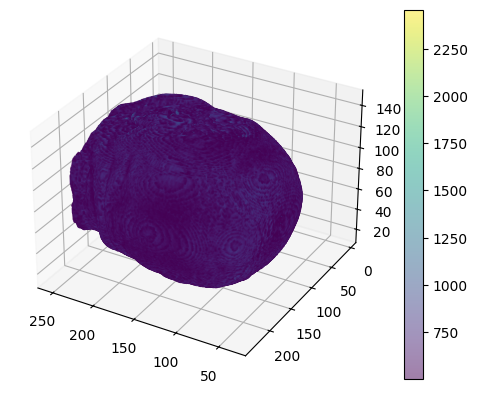

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
import numpy as np

nifti_file = 'ADNI_ORG/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 500
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

In [14]:
'ADNI_ORG/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii'
import nibabel as nib

nii_file_path = 'path_to_your_nii_file.nii'
nii_image = nib.load(
    'ADNI_ORG/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (256, 256, 166)


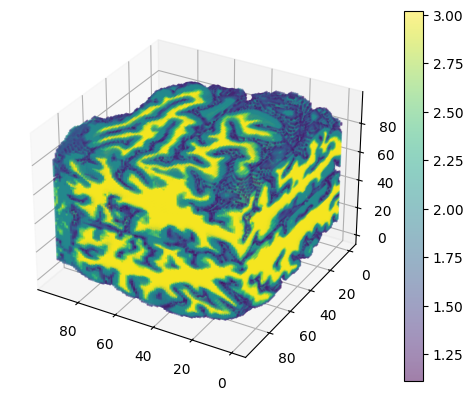

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
import numpy as np

nifti_file = 'ADNI_RESIZED/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 1
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

c:\Users\MR600\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



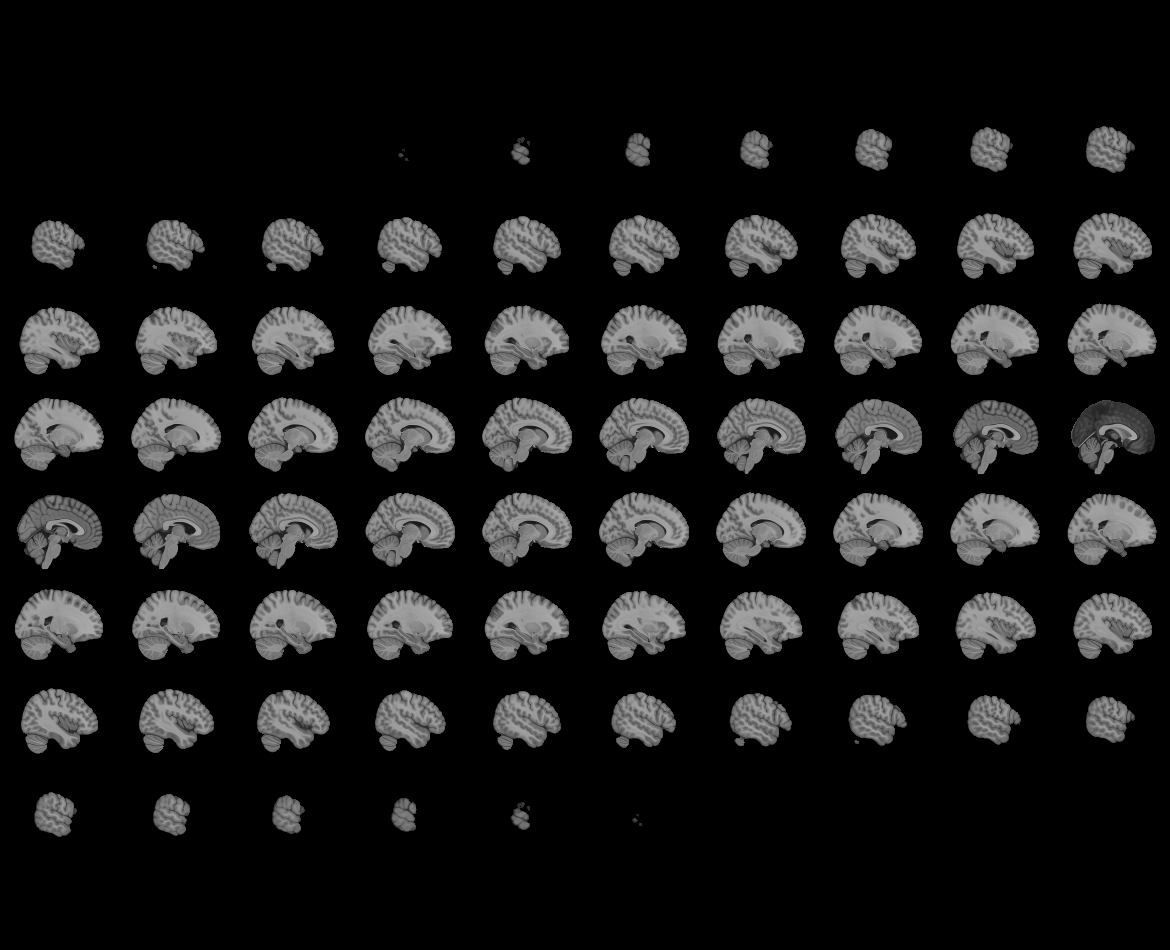
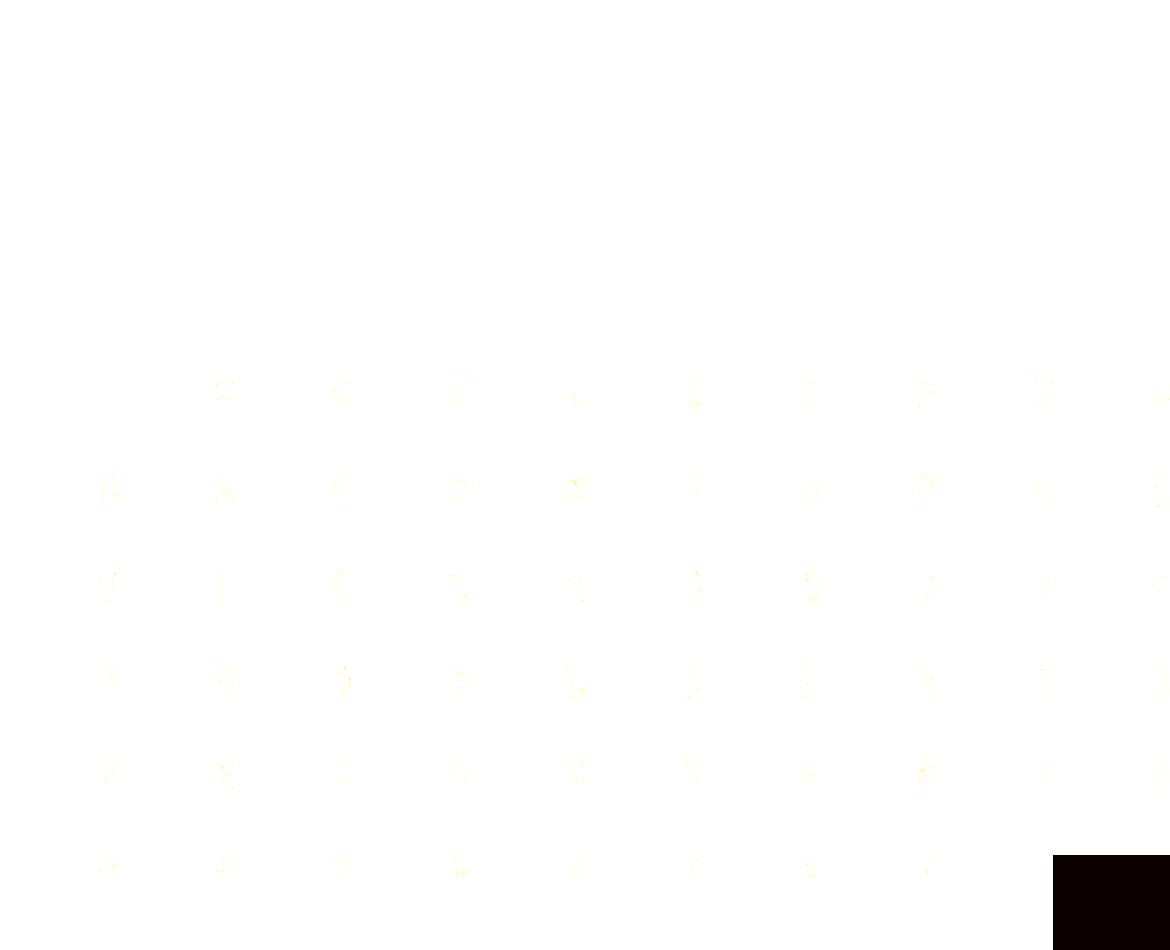

In [11]:
from nilearn import plotting

nifti_file = 'ADNI_RESIZED/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction_Br_20070219174038655_S21856_I40967.nii'

view = plotting.view_img(nifti_file, threshold='auto')
view

# IR-SPGR

In [27]:
nii_image = nib.load(
    'dataB/I294134.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (196, 256, 256)


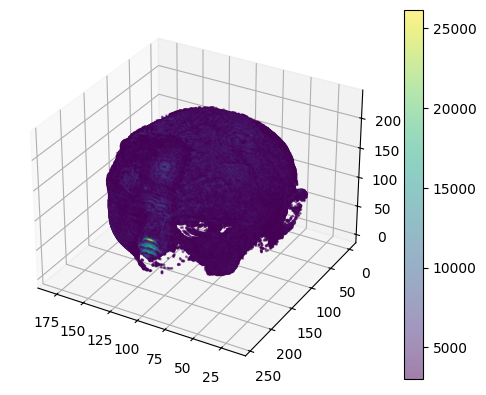

In [41]:
nifti_file = 'dataB/I294134.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 3000
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

# calibration scan

In [32]:
nii_image = nib.load(
    'dataB/I294136.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (64, 64, 60)


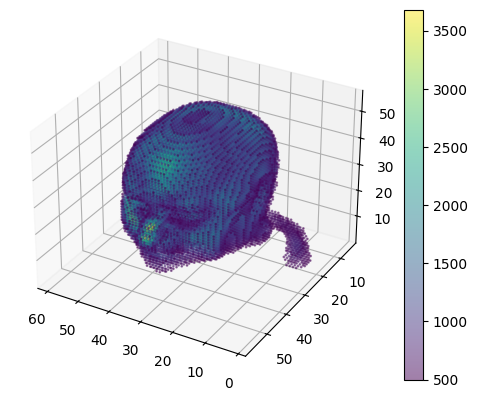

In [40]:
nifti_file = 'dataB/I294136.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 500
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

# T2-weighted trace

In [42]:
nii_image = nib.load(
    'dataB/I294138.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (256, 256, 53)


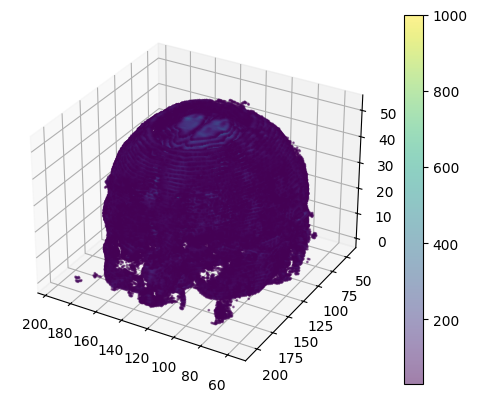

In [47]:
nifti_file = 'dataB/I294138.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 30
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

# AXIAL FLAIR

In [48]:
nii_image = nib.load(
    'dataB/I294139.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (256, 256, 35)


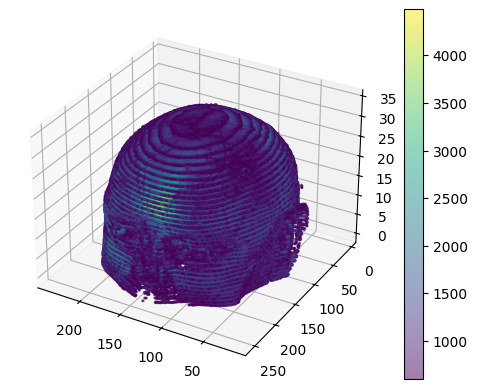

In [53]:
nifti_file = 'dataB/I294139.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 600
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()

# Axial T2star

In [54]:
nii_image = nib.load(
    'dataB/I294132.nii')
image_data = nii_image.get_fdata()

print("Dimensions of the NIFTI image:", image_data.shape)

Dimensions of the NIFTI image: (256, 256, 44)


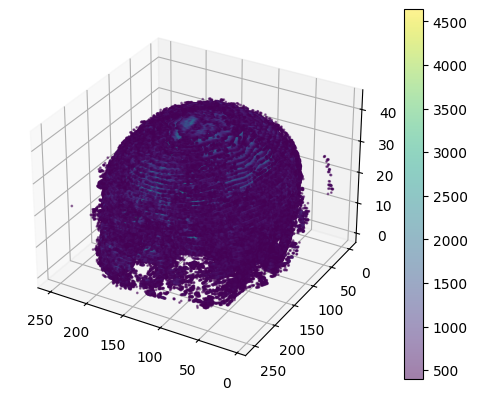

In [56]:
nifti_file = 'dataB/I294132.nii'
img = nib.load(nifti_file)
data = img.get_fdata()


threshold = 400
data[data < threshold] = np.nan

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(~np.isnan(data))
sc = ax.scatter(x, y, z, c=data[x, y, z],
                cmap='viridis', alpha=0.5, s=1)


ax.view_init(30, 120)

plt.colorbar(sc) 
plt.show()